In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.preprocessing import OneHotEncoder as OHE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('train.csv')
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.columns = list(map( lambda x: x.lower(), data.columns))

In [4]:
data.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [11]:
data.isna().sum()/len(data)*100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

In [7]:
#  Dropping cols: cabin has many nans, name and Id cols not needed in model
# cleaned_data = data.drop(['cabin', 'name', 'passengerid'], axis = 1)
# cleaned_data.head()

In [8]:
data = data.drop(['name', 'passengerid', 'ticket'], axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
# data['survived'] = data['survived'].astype('object')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

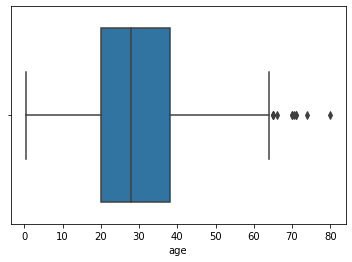

In [9]:
sns.boxplot(data['age'])

In [11]:
# data['age'].fillna(data['age'].mean(), inplace=True)
# data['age'].unique

In [10]:
#  from instructor. calculates mean of only non-nulls values. 
# replaces nulls with that adjusted mean
temp_age = data[data['age'].isna() == False]['age']
median_age = np.median(temp_age)
data['age'] = data['age'].fillna(median_age)

In [12]:
data['cabin'].dtype

dtype('O')

In [15]:
data['cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabin, Length: 147, dtype: int64

In [21]:
def clean_cabin(x):
    if pd.isna(x):
        return np.nan
    else:
        return x[0]

In [22]:
 data['cabin'] = list(map(clean_cabin, data['cabin']))

In [23]:
data['cabin'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64

In [24]:
data['cabin'] = data['cabin'].fillna('C')
data['cabin'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64

In [25]:
def clean_cabin_g_t(x):
    if x == 'G' or x == 'T':
        return 'F'
    else:
        return x

In [26]:
data['cabin'] = list(map(clean_cabin_g_t, data['cabin']))
data['cabin'].unique()

array(['C', 'E', 'F', 'D', 'A', 'B'], dtype=object)

In [27]:
data.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       2
dtype: int64

In [29]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [30]:
data['embarked'] = data['embarked'].fillna('S')

In [31]:
data['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [39]:
data['parch'].unique()

array(['0', '1', '2', '5', '3', '4', '6'], dtype=object)

In [40]:
def clean_parch(x):
    if x in ['3', '4', '5', '6']:
        return '2'
    else:
        return str(x)

In [41]:
data['parch'] = list(map(clean_parch, data['parch']))

In [42]:
data['parch'].value_counts()

0    678
1    118
2     95
Name: parch, dtype: int64

In [27]:
data.dtypes

survived     object
pclass        int64
sex          object
age         float64
sibsp         int64
parch        object
fare        float64
cabin        object
embarked     object
dtype: object

In [28]:
data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
dtype: int64

In [29]:
# Changed col to string since the data is categorical in natuer
data['pclass'] = data['pclass'].astype('object')

data.dtypes

survived     object
pclass       object
sex          object
age         float64
sibsp         int64
parch        object
fare        float64
cabin        object
embarked     object
dtype: object

In [35]:
nums = data[['age', 'sibsp', 'fare']]
corr_matrix = nums.corr()

In [36]:
corr_matrix

,age,sibsp,fare
age,1.000000,-0.233296,0.096688
sibsp,-0.233296,1.000000,0.159651
fare,0.096688,0.159651,1.000000


<AxesSubplot:>

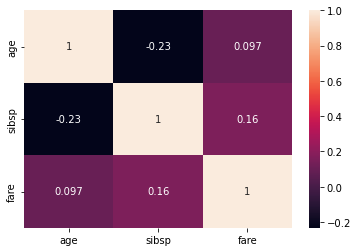

In [37]:
sns.heatmap(corr_matrix, annot=True)


C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

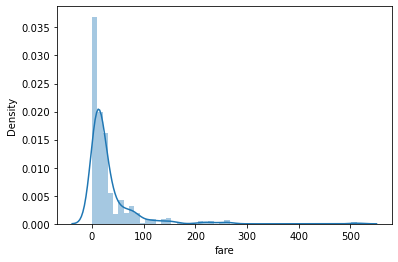

In [43]:
sns.distplot(data['fare'])

In [44]:
min(data['fare'])

0.0

C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

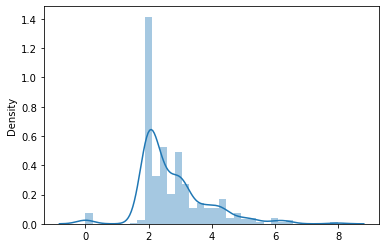

In [45]:
cbrt_fare = list(map(lambda x: x**.333, data['fare']))
sns.distplot(cbrt_fare)

In [52]:
def log_transform(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


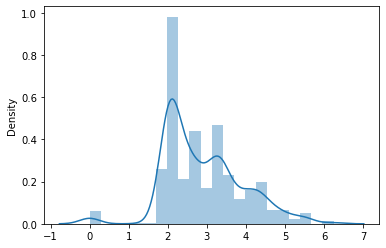

In [53]:
log_fare = list(map(log_transform, data['fare']))
sns.distplot(log_fare)
plt.show()

In [79]:
y = data['survived'].astype('int')
x = data.drop('survived', axis=1)

In [56]:
# y = data['survived']
# x = data.drop('survived', axis=1)

In [80]:
y.unique()

array([0, 1])

In [81]:
numericals = x[['age', 'sibsp', 'fare']]
categoricals = x[['pclass', 'sex', 'parch', 'cabin', 'embarked']]

In [82]:
y.dtypes

dtype('int32')

In [83]:
scaled = Normalizer().fit_transform(numericals)
scaled = pd.DataFrame(scaled)

In [84]:
scaled.head()

,0,1,2
0,0.948873,0.043131,0.312697
1,0.470381,0.012378,0.882377
2,0.956551,0.000000,0.291564
3,0.550270,0.015722,0.834839
4,0.974555,0.000000,0.224148


In [85]:
encoded = OHE(drop='first').fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded)
encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [86]:
features = pd.concat([scaled, encoded], axis =1 )

In [87]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=.15, random_state=42)

In [88]:
model = LogisticRegression(multi_class='ovr').fit(x_train, y_train)

In [90]:
predictions = model.predict(x_test)

In [91]:
confusion_matrix(y_test, predictions)

array([[64, 14],
       [15, 41]], dtype=int64)

In [92]:
accuracy_score(y_test, predictions)

0.7835820895522388

In [93]:
y_test.value_counts()

0    78
1    56
Name: survived, dtype: int64

In [ ]:
# 